In [32]:
import numpy as np
import math,copy
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data
np.set_printoptions(precision = 2)
import warnings
warnings.filterwarnings('ignore')

In [33]:
X_train,y_train = load_house_data()
X_features = ["size(in sqft.)", "bedrooms", "floors", "age"]

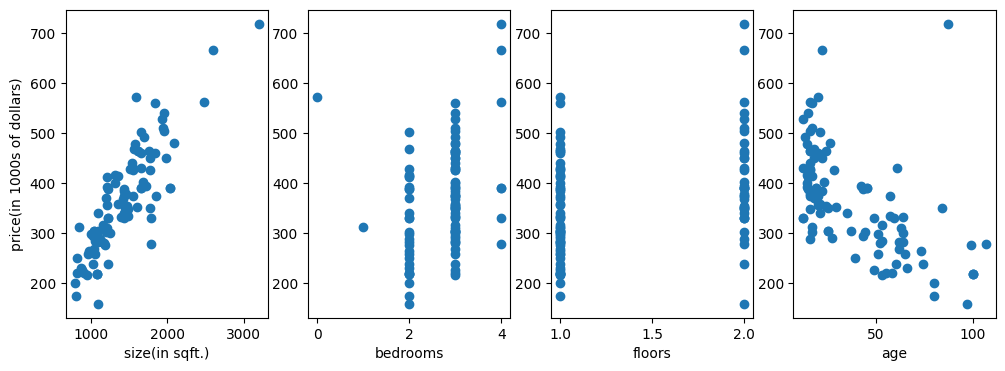

In [34]:
fig,ax = plt.subplots(1,4,figsize = (12,4))
for i in range(len(ax)):
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_train)
ax[0].set_ylabel("price(in 1000s of dollars)")
plt.show()

In [35]:
def compute_cost(X,y,w,b):
    m,n = X.shape
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(X[i],w) + b
        cost = cost + (f_wb - y[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [36]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i],w) + b
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [37]:
def gradient_descent(X,y,w,b,num_iters,alpha,cost_function,gradient_function):
    m,n = X.shape
    print("Iteration Cost      w0      w1      w2      w3      b       dj_dw0     dj_dw1     dj_dw2     dj_dw3      dj_db")
    print("------------------|-------|--------|-------|-------|-------|----------|----------|----------|----------|--------|")
    hist = [[],[],[],[]]
    hist[0] = []
    hist[1] = []
    hist[2] = []
    hist[3] = []
    w = copy.deepcopy(w)
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        hist[0].append(i)
        hist[1].append(cost_function(X,y,w,b))
        hist[2].append([w,b])
        hist[3].append([dj_dw,dj_db])
        if i%math.ceil(num_iters/10) == 0:
            cst = cost_function(X,y,w,b)
            print(f"{i:9d} | {cst:0.1e} |  {w[0]:0.1e} |  {w[1]:0.1e} | {w[2]:0.1e} | {w[3]:0.1e} | {b:0.1e} | {dj_dw[0]:0.1e} | {dj_dw[1]:0.1e} | {dj_dw[2]:0.1e} | {dj_dw[3]:0.1e} | {dj_db:0.1e}")
    return w,b,hist

In [38]:
def run_gradient_descent(X,y,iterations,alpha):
    m,n = X.shape
    w_in = np.zeros(n)
    b_in = 0
    w_final,b_final,hist = gradient_descent(X_train,y_train,w_in,b_in,iterations,alpha,compute_cost,compute_gradient)
    print(f"After the given no. of iterations the value of w is {w_final} and b is {b_final:0.1e}")
    return w_final,b_final,hist

In [39]:
w_final,b_final,hist = run_gradient_descent(X_train,y_train,10,9.9e-7)

Iteration Cost      w0      w1      w2      w3      b       dj_dw0     dj_dw1     dj_dw2     dj_dw3      dj_db
------------------|-------|--------|-------|-------|-------|----------|----------|----------|----------|--------|
        0 | 9.6e+04 |  5.5e-01 |  1.0e-03 | 5.1e-04 | 1.2e-02 | 3.6e-04 | -5.5e+05 | -1.0e+03 | -5.2e+02 | -1.2e+04 | -3.6e+02
        1 | 1.3e+05 |  -8.8e-02 |  -1.7e-04 | -1.0e-04 | -3.4e-03 | -4.8e-05 | 6.4e+05 | 1.2e+03 | 6.2e+02 | 1.6e+04 | 4.1e+02
        2 | 1.7e+05 |  6.5e-01 |  1.2e-03 | 5.9e-04 | 1.3e-02 | 4.3e-04 | -7.4e+05 | -1.4e+03 | -7.0e+02 | -1.7e+04 | -4.9e+02
        3 | 2.3e+05 |  -2.1e-01 |  -4.0e-04 | -2.3e-04 | -7.5e-03 | -1.2e-04 | 8.6e+05 | 1.6e+03 | 8.3e+02 | 2.1e+04 | 5.6e+02
        4 | 3.1e+05 |  7.9e-01 |  1.4e-03 | 7.1e-04 | 1.5e-02 | 5.3e-04 | -1.0e+06 | -1.8e+03 | -9.5e+02 | -2.3e+04 | -6.6e+02
        5 | 4.2e+05 |  -3.7e-01 |  -7.1e-04 | -4.0e-04 | -1.3e-02 | -2.1e-04 | 1.2e+06 | 2.1e+03 | 1.1e+03 | 2.8e+04 | 7.5e+02
        6 | 5

In [40]:
ws = np.array([p[0] for p in hist[2]])
rng = max(ws[:,0])
wr = np.linspace(-rng,rng,20)
ws,rng,wr

(array([[ 5.46e-01,  9.96e-04,  5.13e-04,  1.23e-02],
        [-8.77e-02, -1.74e-04, -1.00e-04, -3.41e-03],
        [ 6.48e-01,  1.17e-03,  5.94e-04,  1.34e-02],
        [-2.06e-01, -4.04e-04, -2.30e-04, -7.54e-03],
        [ 7.85e-01,  1.41e-03,  7.09e-04,  1.53e-02],
        [-3.65e-01, -7.09e-04, -3.98e-04, -1.26e-02],
        [ 9.70e-01,  1.73e-03,  8.69e-04,  1.83e-02],
        [-5.79e-01, -1.12e-03, -6.19e-04, -1.90e-02],
        [ 1.22e+00,  2.18e-03,  1.09e-03,  2.29e-02],
        [-8.68e-01, -1.66e-03, -9.11e-04, -2.72e-02]]),
 1.2190765199640996,
 array([-1.22, -1.09, -0.96, -0.83, -0.71, -0.58, -0.45, -0.32, -0.19,
        -0.06,  0.06,  0.19,  0.32,  0.45,  0.58,  0.71,  0.83,  0.96,
         1.09,  1.22]))

In [41]:
def plot_cost_i_X(X_train,y_train,hist):
    ws = np.array([ p[0] for p in hist[2]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [compute_cost(X_train,y_train,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]
    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist[0], (hist[1]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist[1])
    plt.show()

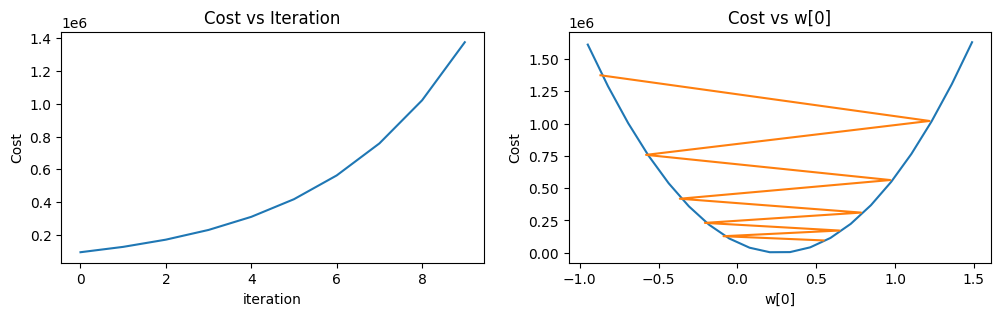

In [42]:
plot_cost_i_X(X_train,y_train,hist)

In [43]:
w_final,b_final,hist = run_gradient_descent(X_train,y_train,10,9e-7)

Iteration Cost      w0      w1      w2      w3      b       dj_dw0     dj_dw1     dj_dw2     dj_dw3      dj_db
------------------|-------|--------|-------|-------|-------|----------|----------|----------|----------|--------|
        0 | 6.6e+04 |  5.0e-01 |  9.1e-04 | 4.7e-04 | 1.1e-02 | 3.3e-04 | -5.5e+05 | -1.0e+03 | -5.2e+02 | -1.2e+04 | -3.6e+02
        1 | 6.2e+04 |  1.8e-02 |  2.1e-05 | 2.0e-06 | -7.9e-04 | 1.9e-05 | 5.3e+05 | 9.8e+02 | 5.2e+02 | 1.3e+04 | 3.4e+02
        2 | 5.8e+04 |  4.8e-01 |  8.6e-04 | 4.4e-04 | 9.5e-03 | 3.2e-04 | -5.1e+05 | -9.3e+02 | -4.8e+02 | -1.1e+04 | -3.4e+02
        3 | 5.4e+04 |  3.4e-02 |  3.9e-05 | 2.8e-06 | -1.6e-03 | 3.8e-05 | 4.9e+05 | 9.1e+02 | 4.8e+02 | 1.2e+04 | 3.2e+02
        4 | 5.0e+04 |  4.6e-01 |  8.2e-04 | 4.1e-04 | 8.0e-03 | 3.2e-04 | -4.8e+05 | -8.7e+02 | -4.5e+02 | -1.1e+04 | -3.1e+02
        5 | 4.7e+04 |  5.0e-02 |  5.6e-05 | 2.5e-06 | -2.4e-03 | 5.6e-05 | 4.6e+05 | 8.5e+02 | 4.5e+02 | 1.2e+04 | 2.9e+02
        6 | 4.3e+04 |  4.

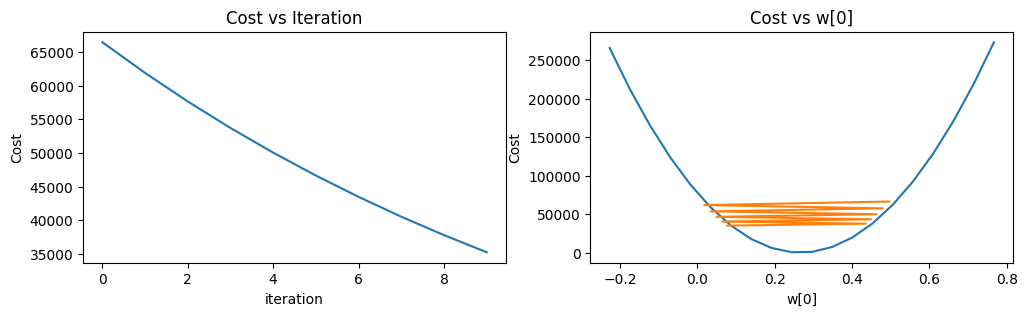

In [44]:
plot_cost_i_X(X_train,y_train,hist)

In [56]:
w_final,b_final,hist = run_gradient_descent(X_train,y_train,10,1e-7)

Iteration Cost      w0      w1      w2      w3      b       dj_dw0     dj_dw1     dj_dw2     dj_dw3      dj_db
------------------|-------|--------|-------|-------|-------|----------|----------|----------|----------|--------|
        0 | 3.3e+15 |  5.5e+04 |  1.0e+02 | 5.2e+01 | 1.2e+03 | 3.6e+01 | -5.5e+05 | -1.0e+03 | -5.2e+02 | -1.2e+04 | -3.6e+02
      100 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      200 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      300 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      400 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      500 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      600 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      700 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      800 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      900 | nan |  nan |

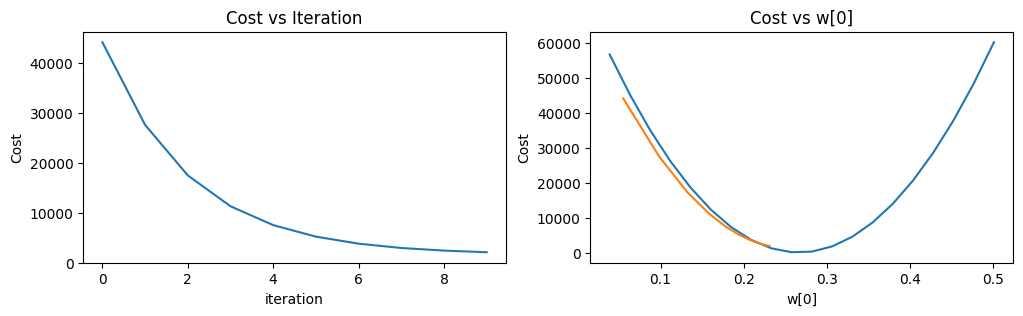

In [46]:
plot_cost_i_X(X_train,y_train,hist)

In [47]:
def Z_score_normalization(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X - mu)/sigma
    return X_norm,mu,sigma

Text(0.5, 0.98, 'distribution of features before,during and after normalization')

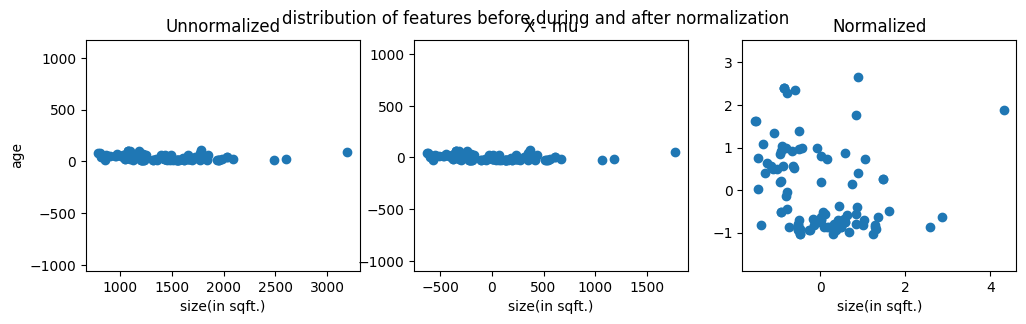

In [48]:
X_norm,X_mu,X_sigma = Z_score_normalization(X_train)
X_mean = X_train - X_mu

fig,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].scatter(X_train[:,0],X_train[:,3])
ax[0].set_xlabel(X_features[0]),ax[0].set_ylabel(X_features[3])
ax[0].set_title("Unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0],X_mean[:,3])
ax[1].set_xlabel(X_features[0])
ax[1].set_title("X - mu")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0],X_norm[:,3])
ax[2].set_xlabel(X_features[0])
ax[2].set_title("Normalized")
ax[2].axis('equal')
fig.suptitle("distribution of features before,during and after normalization")

In [49]:
print(f"mu : {X_mu} , \n sigma : {X_sigma}")
print(f"Peak to peak range by column in Raw X: {np.ptp(X_train,axis = 0)}")
print(f"Peak to peak range by column in Normalized X: {np.ptp(X_norm,axis=0)}")

mu : [1.42e+03 2.72e+00 1.38e+00 3.84e+01] , 
 sigma : [411.62   0.65   0.49  25.78]
Peak to peak range by column in Raw X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


In [50]:
X_norm

array([[-4.24e-01,  4.34e-01, -7.89e-01,  9.94e-01],
       [ 1.28e+00,  4.34e-01,  1.27e+00, -8.30e-01],
       [ 7.45e-01,  4.34e-01,  1.27e+00,  1.40e-01],
       [ 1.31e+00,  4.34e-01,  1.27e+00, -9.07e-01],
       [-2.54e-01, -1.10e+00, -7.89e-01, -9.46e-01],
       [-1.35e+00, -1.10e+00, -7.89e-01,  1.07e+00],
       [ 1.01e+00,  4.34e-01, -7.89e-01, -8.30e-01],
       [-9.53e-01,  4.34e-01, -7.89e-01,  1.79e-01],
       [ 4.31e+00,  1.97e+00,  1.27e+00,  1.89e+00],
       [-1.53e+00, -1.10e+00, -7.89e-01,  1.61e+00],
       [-5.31e-01, -1.10e+00,  1.27e+00, -8.30e-01],
       [ 3.37e-01, -1.10e+00, -7.89e-01, -7.91e-01],
       [ 2.82e-02,  4.34e-01, -7.89e-01, -7.13e-01],
       [-4.82e-01, -1.10e+00, -7.89e-01, -9.07e-01],
       [-7.93e-01, -1.10e+00, -7.89e-01,  9.94e-01],
       [-1.39e+00, -2.63e+00, -7.89e-01, -8.30e-01],
       [ 6.40e-01,  4.34e-01,  1.27e+00, -5.97e-01],
       [ 8.49e-01,  4.34e-01,  1.27e+00, -7.91e-01],
       [-9.19e-01,  4.34e-01, -7.89e-01,  2.18

In [57]:

w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 0.1, )

Iteration Cost      w0      w1      w2      w3      b       dj_dw0     dj_dw1     dj_dw2     dj_dw3      dj_db
------------------|-------|--------|-------|-------|-------|----------|----------|----------|----------|--------|
        0 | 3.3e+15 |  5.5e+04 |  1.0e+02 | 5.2e+01 | 1.2e+03 | 3.6e+01 | -5.5e+05 | -1.0e+03 | -5.2e+02 | -1.2e+04 | -3.6e+02
      100 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      200 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      300 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      400 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      500 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      600 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      700 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      800 | nan |  nan |  nan | nan | nan | nan | nan | nan | nan | nan | nan
      900 | nan |  nan |

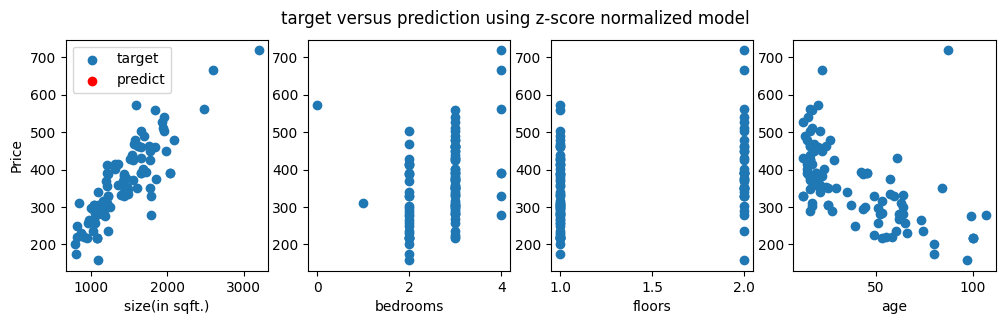

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [53]:
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3))
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color='red', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()
yp